
**Задание:**
>- Посчитаем, *сколько книг вышло после 1 января 2000 года*;
>- Для каждой книги посчитаем *количество обзоров и среднюю оценку*;
>- Определим *издательство*, которое выпустило *наибольшее число книг толще
50 страниц* — так мы исключите из анализа брошюры;
>- Определим *автора с самой высокой средней оценкой книг* — учитывая
только книги с 50 и более оценками;
>- Посчитаем *среднее количество обзоров от пользователей*, которые поставили
больше 50 оценок.
---

**Цели исследования**
> Проанализировать базу данных, чтобы сформулировать ценностное предложение для нового продукта.




---

<a id='data_schema'></a>
<div style='border:solid black 1px; padding: 10px'>
   
**Схема базы данных**
    
    
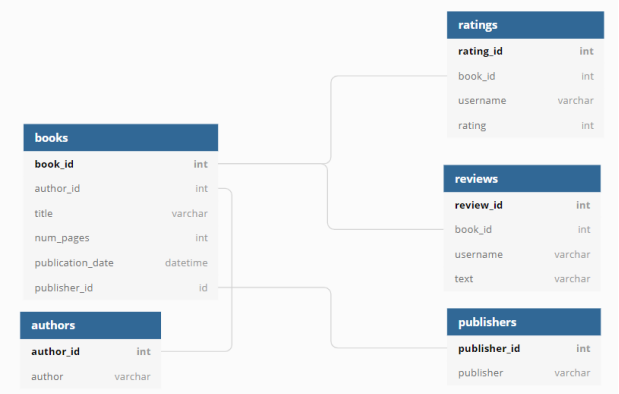
    
    
</div>



<a id='content'></a>

**Декомпозиция задачи:**
- [1: Обзор данных](#1)
- [2: Задание №1: Посчитаем, сколько книг вышло после 1 января 2000 года](#2)
- [3: Задание №2: Для каждой книги посчитаем количество обзоров и среднюю оценку](#3)
- [4: Задание №3: Определим издательство, которое выпустило наибольшее число книг толще 50 страниц](#4)
- [5: Задание №4: Определим автора с самой высокой средней оценкой книг](#5)
- [6: Задание №5: Посчитаем среднее количество обзоров от пользователей, которые поставили больше 50 оценок](#6)
- [7: Общий вывод](#7)

In [1]:
# импортируем библиотеки

import pandas as pd
import numpy as np
from sqlalchemy import create_engine

In [2]:
# устанавливаем параметры
db_config = {'user': 'имя пользователя',                    # имя пользователя
             'pwd': 'пароль',                               # пароль
             'host': 'хост',                                # хост
             'port': 'порт подключения',                    # порт подключения
             'db': 'название базы данных'                   # название базы данных
            } 



# сохраним строку соединения
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                         db_config['pwd'],
                                                         db_config['host'],
                                                         db_config['port'],
                                                         db_config['db']

                                                        
                                                        )
# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'}) 

In [3]:
# напишем небольшую функцию, которая будет выводить таблицу по запросу

def sql_table(query):
    
    return pd.io.sql.read_sql(query, con = engine) 

<a id='1'></a>
## [1: Обзор данных](#content)


[Схема данных](#data_schema)

### 1.1: **Таблица books** - cодержит данные о книгах

Выведем первые строки и изучим ее.

In [4]:
# выведем первые строки на экран

# выполним запрос
query = '''SELECT *
           FROM books
           LIMIT(10);
           '''
# выведем таблицу на экран
sql_table(query)

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268
5,6,257,1st to Die (Women's Murder Club #1),424,2005-05-20,116
6,7,258,2nd Chance (Women's Murder Club #2),400,2005-05-20,116
7,8,260,4th of July (Women's Murder Club #4),448,2006-06-01,318
8,9,563,A Beautiful Mind,461,2002-02-04,104
9,10,445,A Bend in the Road,341,2005-04-01,116


---
**Описание данных:**

**Таблица books** - cодержит данные о книгах:
> `book_id` — идентификатор книги;  
> `author_id` — идентификатор автора;  
> `title` — название книги;  
> `num_pages` — количество страниц;  
> `publication_date` — дата публикации книги;  
> `publisher_id` — идентификатор издателя.  


  
    

### 1.2:  **Таблица authors** - cодержит данные об авторах

Выведем первые строки и изучим ее.

In [5]:
# выведем первые строки на экран

# выполним запрос
query = '''SELECT *
           FROM authors
           LIMIT(10);
           '''
# выведем таблицу на экран
sql_table(query)

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd
5,6,Alan Paton
6,7,Albert Camus/Justin O'Brien
7,8,Aldous Huxley
8,9,Aldous Huxley/Christopher Hitchens
9,10,Aleksandr Solzhenitsyn/H.T. Willetts


---
**Описание данных:**

**Таблица authors** - cодержит данные об авторах:
> `author_id` — идентификатор автора;  
> `author` — имя автора.  




### 1.3:  **Таблица publishers** - cодержит данные об издательствах

Выведем первые строки и изучим ее.

In [6]:
# выведем первые строки на экран

# выполним запрос
query = '''SELECT *
           FROM publishers
           LIMIT(10);
           '''
# выведем таблицу на экран
sql_table(query)

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company
5,6,Aladdin
6,7,Aladdin Paperbacks
7,8,Albin Michel
8,9,Alfred A. Knopf
9,10,Alfred A. Knopf Books for Young Readers


---
**Описание данных:**

**Таблица publishers** - cодержит данные об издательствах:
> `publisher_id` — идентификатор издательства;  
> `publisher` — название издательства;  



### 1.4:  **Таблица ratings** - cодержит данные о пользовательских оценках книг

Выведем первые строки и изучим ее.

In [7]:
# выведем первые строки на экран

# выполним запрос
query = '''SELECT *
           FROM ratings
           LIMIT(10);
           '''
# выведем таблицу на экран
sql_table(query)

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2
5,6,3,johnsonamanda,4
6,7,3,scotttamara,5
7,8,3,lesliegibbs,5
8,9,4,abbottjames,5
9,10,4,valenciaanne,4


---
**Описание данных:**

**Таблица ratings** - cодержит данные о пользовательских оценках книг:
> `rating_id` — идентификатор оценки;  
> `book_id` — идентификатор книги;  
> `username` — имя пользователя, оставившего оценку;  
> `rating` — оценка книги.  



### 1.5:  **Таблица reviews** - cодержит данные о пользовательских обзорах на книги

Выведем первые строки и изучим ее.

In [8]:
# выведем первые строки на экран

# выполним запрос
query = '''SELECT *
           FROM reviews
           LIMIT(10);
           '''
# выведем таблицу на экран
sql_table(query)

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...
5,6,3,lesliegibbs,Analysis no several cause international.
6,7,4,valenciaanne,One there cost another. Say type save. With pe...
7,8,4,abbottjames,Within enough mother. There at system full rec...
8,9,5,npowers,Thank now focus realize economy focus fly. Ite...
9,10,5,staylor,Game push lot reduce where remember. Including...


---
**Описание данных:**

**Таблица reviews** - cодержит данные о пользовательских обзорах на книги:
> `review_id` — идентификатор обзора;  
> `book_id` — идентификатор книги;  
> `username` — имя пользователя, написавшего обзор;  
> `text` — текст обзора.

<a id='2'></a>
## [2: Задание №1: Посчитаем, сколько книг вышло после 1 января 2000 года](#content)

[Схема данных](#data_schema)

In [9]:
# в таблице books PK - он уникалень, посчитаем сколько книг вышло по нему

query = '''SELECT COUNT(book_id) AS count_books
           FROM books
           WHERE publication_date > '2000-01-01';
           '''

sql_table(query)

,count_books
0,819


**819** книг вышло после 1 января 2000 года.

<a id='3'></a>
## [3: Задание №2: Для каждой книги посчитаем количество обзоров и среднюю оценку](#content)

[Схема данных](#data_schema)

In [10]:
# напишем запрос
query = '''SELECT b.title,
                  AVG(rat.rating) AS mean_rating,
                  COUNT(DISTINCT rev.review_id) AS count_review
           FROM books AS b
           LEFT JOIN reviews AS rev ON b.book_id = rev.book_id
           LEFT JOIN ratings AS rat ON b.book_id = rat.book_id
           GROUP BY b.title
           ORDER BY count_review DESC,
                    mean_rating DESC;


'''
# выведем данные на экран
sql_table(query)

,title,mean_rating,count_review
0,Memoirs of a Geisha,4.138462,8
1,Twilight (Twilight #1),3.662500,7
2,Harry Potter and the Prisoner of Azkaban (Harr...,4.414634,6
3,Harry Potter and the Chamber of Secrets (Harry...,4.287500,6
4,The Book Thief,4.264151,6
...,...,...,...
994,Disney's Beauty and the Beast (A Little Golden...,4.000000,0
995,Essential Tales and Poems,4.000000,0
996,Leonardo's Notebooks,4.000000,0
997,Anne Rice's The Vampire Lestat: A Graphic Novel,3.666667,0


Видим, что книг в базе всего **999**, ранее определили, что после 1 января 2000 года вышло **819** - получается у нас в базе больше всего книг после этой даты.

Также стоит обратить внимание, что количество обзоров не влияет на рейтинг книги. Можно было предположить, что они имеют прямую связь, и у книг с хорошим рейтингом - хорошие оценки, но это не так как мы видим.

<a id='4'></a>
## [4: Задание №3: Определим издательство, которое выпустило наибольшее число книг толще 50 страниц](#content)

[Схема данных](#data_schema)

In [11]:
# напишем запрос

query = '''SELECT pub.publisher,
                  COUNT(b.book_id) AS count_books
                  
           FROM publishers AS pub
           LEFT JOIN books AS b ON pub.publisher_id = b.publisher_id
           WHERE b.num_pages > 50
           GROUP BY pub.publisher
           ORDER BY count_books DESC
           LIMIT 1;
'''


# выведем на экран
sql_table(query)

,publisher,count_books
0,Penguin Books,42


Издательство **Penguin Books** выпустило больше всего книг тольще 50 страниц - их количество 42 штуки.

<a id='5'></a>
## [5: Задание №4: Определим автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками](#content)

[Схема данных](#data_schema)

In [12]:
# напишем запрос

query = '''

WITH 

t AS (SELECT a.author,
             b.title,
             AVG(r.rating) AS rating
     FROM authors AS a
     LEFT JOIN books AS b ON a.author_id = b.author_id
     LEFT JOIN ratings AS r ON b.book_id = r.book_id
     GROUP BY b.book_id, a.author
     HAVING COUNT(DISTINCT r.rating_id) > 49
     ORDER BY rating DESC)
     
SELECT author,
       AVG(rating)
FROM t
GROUP BY author
ORDER BY avg DESC
     
'''


sql_table(query)

,author,avg
0,J.K. Rowling/Mary GrandPré,4.283844
1,Markus Zusak/Cao Xuân Việt Khương,4.264151
2,J.R.R. Tolkien,4.258446
3,Louisa May Alcott,4.192308
4,Rick Riordan,4.080645
5,William Golding,3.901408
6,J.D. Salinger,3.825581
7,Paulo Coelho/Alan R. Clarke/Özdemir İnce,3.789474
8,William Shakespeare/Paul Werstine/Barbara A. M...,3.787879
9,Dan Brown,3.754540


**J.K. Rowling/Mary GrandPré** имеет больше 49 оценок и ее средний рейтинг выше чем у остальных.

<a id='6'></a>
## [6: Задание №5: Посчитаем среднее количество обзоров от пользователей, которые поставили больше 50 оценок](#content)

[Схема данных](#data_schema)

In [13]:
# напишем  запрос

query = '''

WITH 

rev AS (SELECT username,
               COUNT(review_id) AS count_reviews
        FROM reviews
        GROUP BY username),
            
rat AS (SELECT username
        FROM ratings
        GROUP BY username
        HAVING COUNT(rating_id) > 50)
        
SELECT ROUND(AVG(count_reviews), 2) AS mean_reviews
FROM rev
WHERE username IN (SELECT username
                   FROM rat);
'''

sql_table(query)

,mean_reviews
0,24.33


Среднее количество обзоров от пользователей, которые поставили больше 50 оценок примено равняется **24**

<a id='7'></a>
## [7: Общий вывод](#content)

[Схема данных](#data_schema)

Видим, что книг в базе всего 999, ранее определили, что после 1 января 2000 года вышло 819 - получается у нас в базе больше всего книг после этой даты.

Также стоит обратить внимание, что количество обзоров не влияет на рейтинг книги. Можно было предположить, что они имеют прямую связь, и у книг с хорошим рейтингом - хорошие оценки, но это не так как мы видим.

Издательство Penguin Books выпустило больше всего книг тольще 50 страниц - их количество 42 штуки.

J.K. Rowling/Mary GrandPré имеет больше 49 оценок и ее средний рейтинг выше чем у остальных.

Среднее количество обзоров от пользователей, которые поставили больше 50 оценок примено равняется 24